<a href="https://colab.research.google.com/github/AnjanaMS0217/URL-Phishing-Detection-Project/blob/main/URL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix, classification_report)

In [2]:
import zipfile

zip_path = "/content/drive/MyDrive/Others/archive.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    print(z.namelist())  # lists all files inside


['PhiUSIIL_Phishing_URL_Dataset.csv']


In [3]:
with zipfile.ZipFile(zip_path) as z:
    with z.open("PhiUSIIL_Phishing_URL_Dataset.csv") as f:
        df = pd.read_csv(f, encoding='utf-8', low_memory=False)


In [4]:
print(df.shape)

(235795, 55)


In [5]:
df.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


In [6]:
df.info()     #  Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [7]:
df.isnull().sum()     # Missing Values

,0
URL,0
URLLength,0
Domain,0
DomainLength,0
IsDomainIP,0
TLD,0
URLSimilarityIndex,0
CharContinuationRate,0
TLDLegitimateProb,0
URLCharProb,0


Observation:
There are no null oe missing values.

In [ ]:
duplicates = df.duplicated().sum()      # Duplicates
print("Duplicate rows:", duplicates)

Duplicate rows: 0


In [ ]:
Observations:
There are no duplications.

In [10]:
# Drop Irrelevant or Redundant Columns. Removing them helps reduce noise, prevent overfitting, and speed up model training.
drop_columns = [
    'Domain', 'TLD', 'Title',
    'LineOfCode', 'LargestLineLength', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
    'NoOfEmptyRef', 'NoOfSelfRef', 'NoOfExternalRef',
    'HasSocialNet', 'HasCopyrightInfo', 'Robots', 'IsResponsive',
    'LetterRatioInURL', 'DegitRatioInURL', 'SpacialCharRatioInURL', 'ObfuscationRatio',
    'CharContinuationRate', 'URLCharProb', 'URLSimilarityIndex',
    'TLDLength', 'DomainTitleMatchScore', 'URLTitleMatchScore',
    'HasDescription', 'HasSubmitButton', 'HasHiddenFields'
]

df = df.drop(columns=[col for col in drop_columns if col in df.columns], errors='ignore')

print(" Final columns for training:", len(df.columns))
print(df.columns.tolist())

 Final columns for training: 27
['URL', 'URLLength', 'DomainLength', 'IsDomainIP', 'TLDLegitimateProb', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'NoOfLettersInURL', 'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'label']


In [11]:
# Check non-numeric columns
df.select_dtypes(include='object').columns


Index(['URL'], dtype='object')

In [12]:
df.info()     # Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   DomainLength                235795 non-null  int64  
 3   IsDomainIP                  235795 non-null  int64  
 4   TLDLegitimateProb           235795 non-null  float64
 5   NoOfSubDomain               235795 non-null  int64  
 6   HasObfuscation              235795 non-null  int64  
 7   NoOfObfuscatedChar          235795 non-null  int64  
 8   NoOfLettersInURL            235795 non-null  int64  
 9   NoOfDegitsInURL             235795 non-null  int64  
 10  NoOfEqualsInURL             235795 non-null  int64  
 11  NoOfQMarkInURL              235795 non-null  int64  
 12  NoOfAmpersandInURL          235795 non-null  int64  
 13  NoOfOtherSpeci

In [13]:
df['label'].value_counts()

,count
label,
1,134850
0,100945


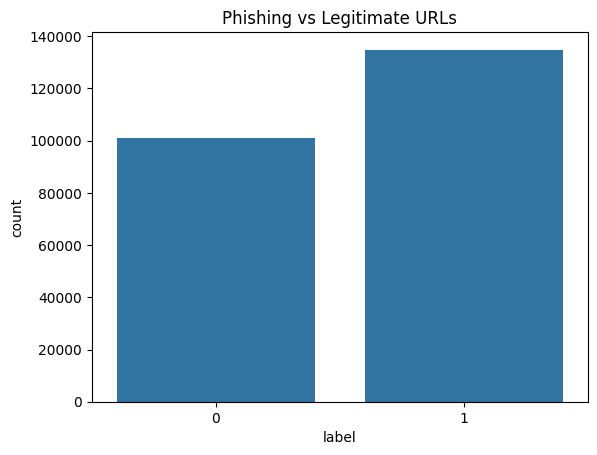

,proportion
label,
1,57.189508
0,42.810492


In [14]:
sns.countplot(x='label', data=df)
plt.title("Phishing vs Legitimate URLs")
plt.show()

df['label'].value_counts(normalize=True) * 100


Observation:

The dataset shows that the number of phishing and legitimate URLs are approximately (check ratio in chart).
If there is imbalance, it may affect model performance — especially recall on minority class.

In [15]:
# Count of each class
label_counts = df['label'].value_counts()

# Display counts
print("Label counts:")
print(label_counts)

# Calculate ratio and percentage
ratio = label_counts[1] / label_counts[0]
percentage = (label_counts / label_counts.sum()) * 100

print(f"\nRatio (Legitimate : Phishing) = {ratio:.2f} : 1")
print("\nPercentage distribution:")
print(percentage)

Label counts:
label
1    134850
0    100945
Name: count, dtype: int64

Ratio (Legitimate : Phishing) = 1.34 : 1

Percentage distribution:
label
1    57.189508
0    42.810492
Name: count, dtype: float64


Observation:
The target variable (label) is fairly balanced (≈57% legitimate, 43% phishing).

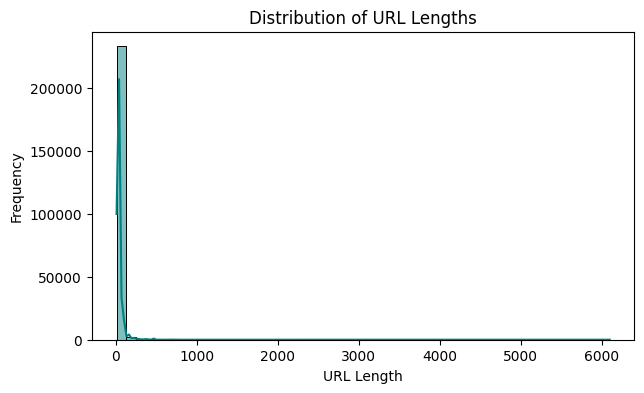

In [16]:
plt.figure(figsize=(7,4))
sns.histplot(df['URLLength'], bins=50, kde=True, color='teal')
plt.title("Distribution of URL Lengths")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()


Observation:
Most URLs are short, but a few very long ones create a right-skewed pattern — phishing URLs often tend to be longer and more complex.

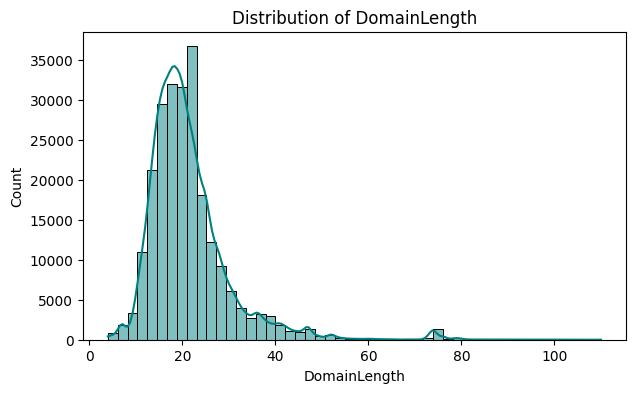

In [18]:
plt.figure(figsize=(7,4))
sns.histplot(df['DomainLength'], bins=50, kde=True, color='teal')
plt.title("Distribution of DomainLength")
plt.xlabel("DomainLength")
plt.show()

Observation:

Phishing URLs tend to be longer on average than legitimate ones, as attackers add extra subdomains or parameters to disguise links.

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


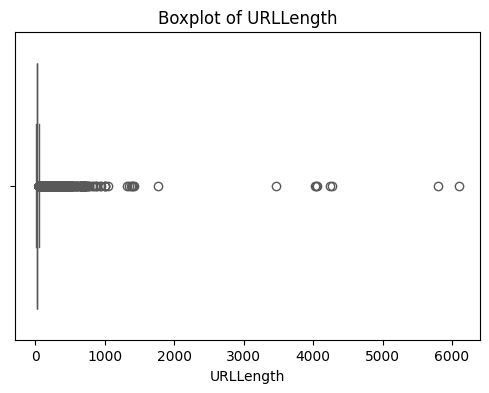

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


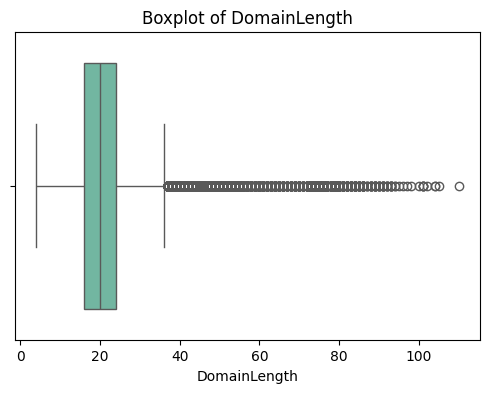

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


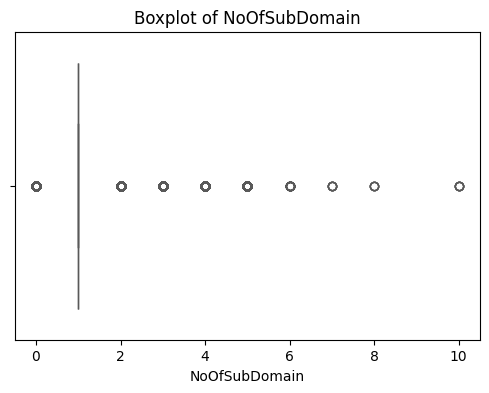

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


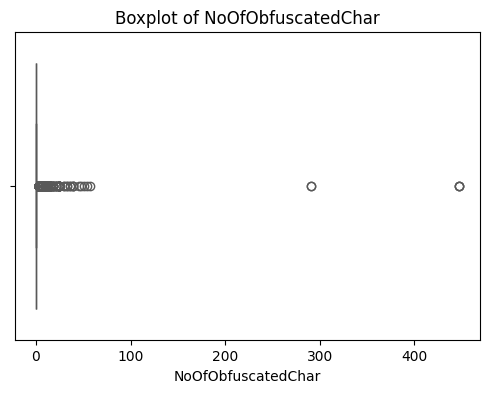

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


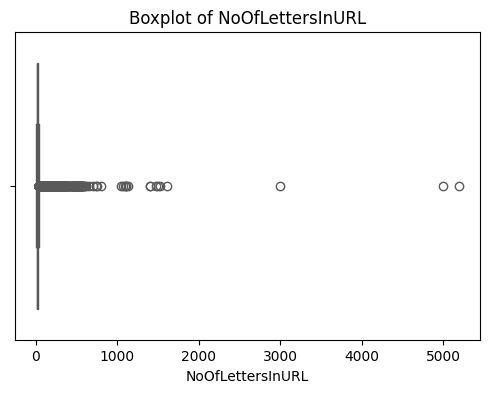

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


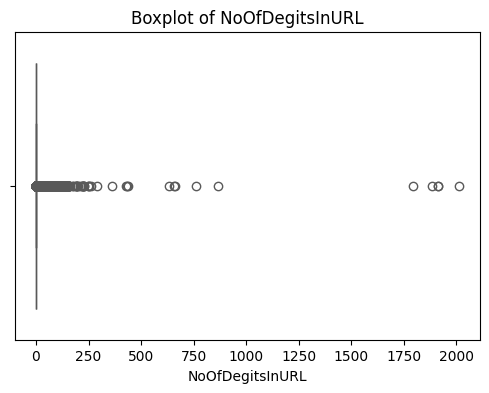

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


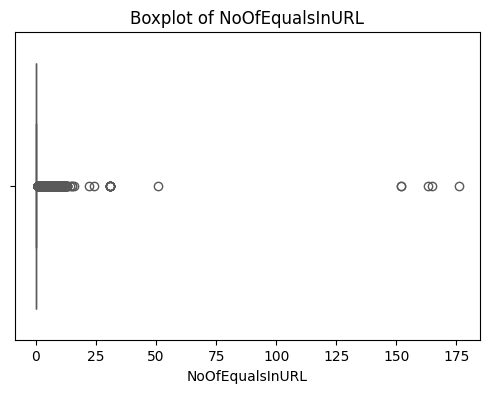

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


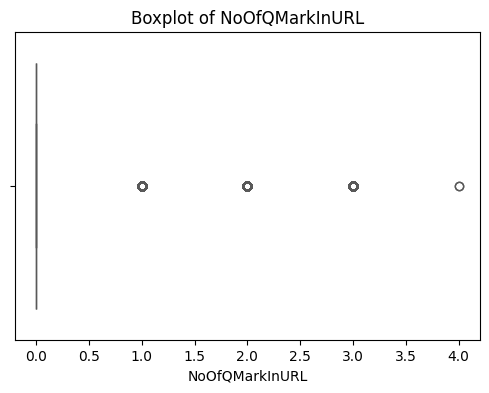

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


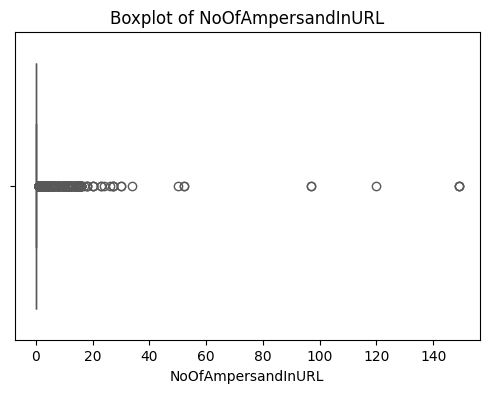

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


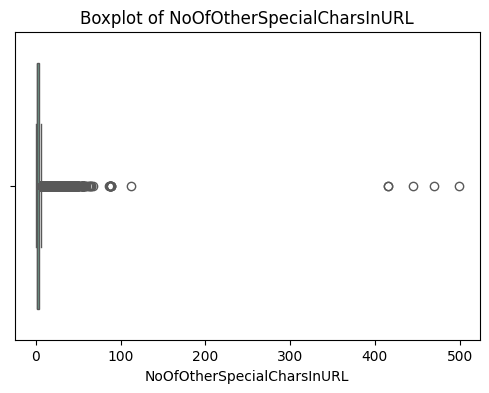

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


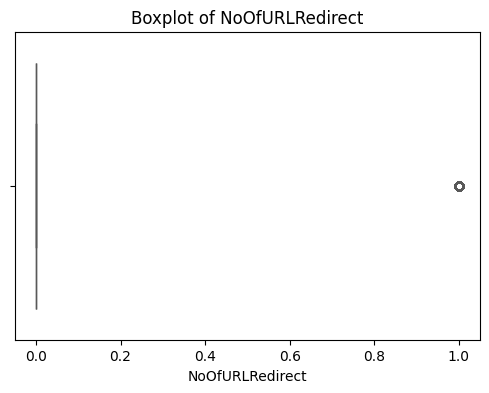

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


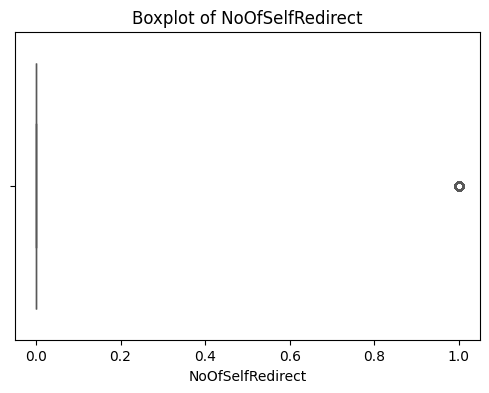

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


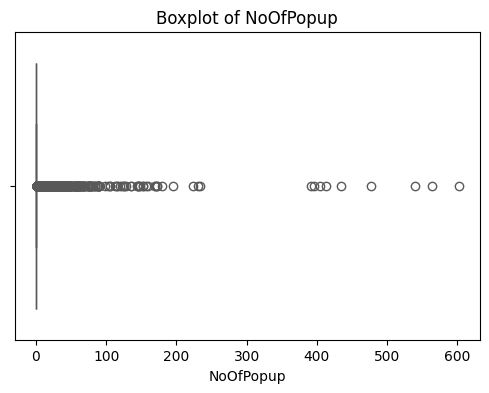

/tmp/ipython-input-2192109735.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set2')


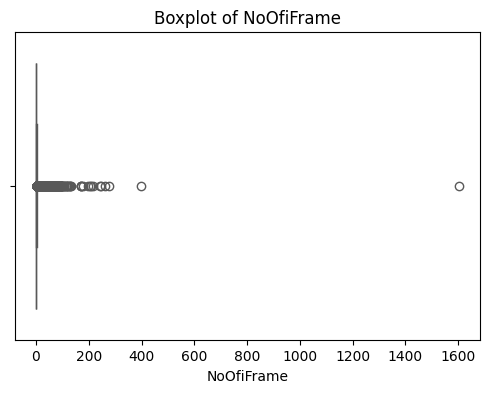

In [21]:
numerical_cols = [
    'URLLength', 'DomainLength', 'NoOfSubDomain', 'NoOfObfuscatedChar',
    'NoOfLettersInURL', 'NoOfDegitsInURL', 'NoOfEqualsInURL',
    'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
    'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame'
]

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], palette='Set2')
    plt.title(f'Boxplot of {col}')
    plt.show()

Observation:
Outlier Detection (Box Plots)-

Outliers are observed in features like URLLength, NoOfObfuscatedChar, and NoOfLettersInURL, possibly due to very long or heavily encoded URLs.

Since tree-based ensemble models (e.g., Random Forest, XGBoost) are not sensitive to outliers, they can be safely retained without scaling or transformation.

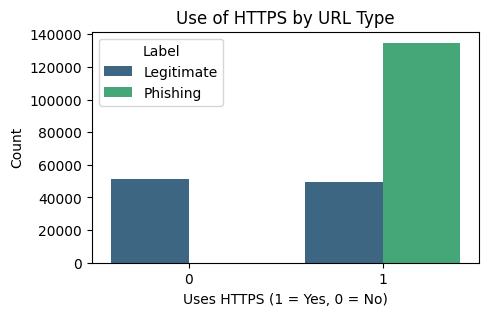

In [22]:
plt.figure(figsize=(5,3))
sns.countplot(x='IsHTTPS', hue='label', data=df, palette='viridis')
plt.title("Use of HTTPS by URL Type")
plt.xlabel("Uses HTTPS (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.legend(title='Label', labels=['Legitimate', 'Phishing'])
plt.show()


Observation:

While many phishing sites still avoid HTTPS, modern phishing pages increasingly use HTTPS to appear trustworthy.

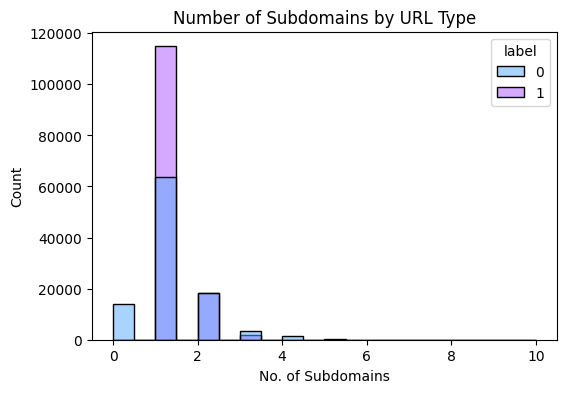

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df, x='NoOfSubDomain', hue='label', bins=20, kde=False, palette='cool')
plt.title("Number of Subdomains by URL Type")
plt.xlabel("No. of Subdomains")
plt.ylabel("Count")
plt.show()


Observation:

Phishing URLs typically contain multiple subdomains to mimic legitimate sites.

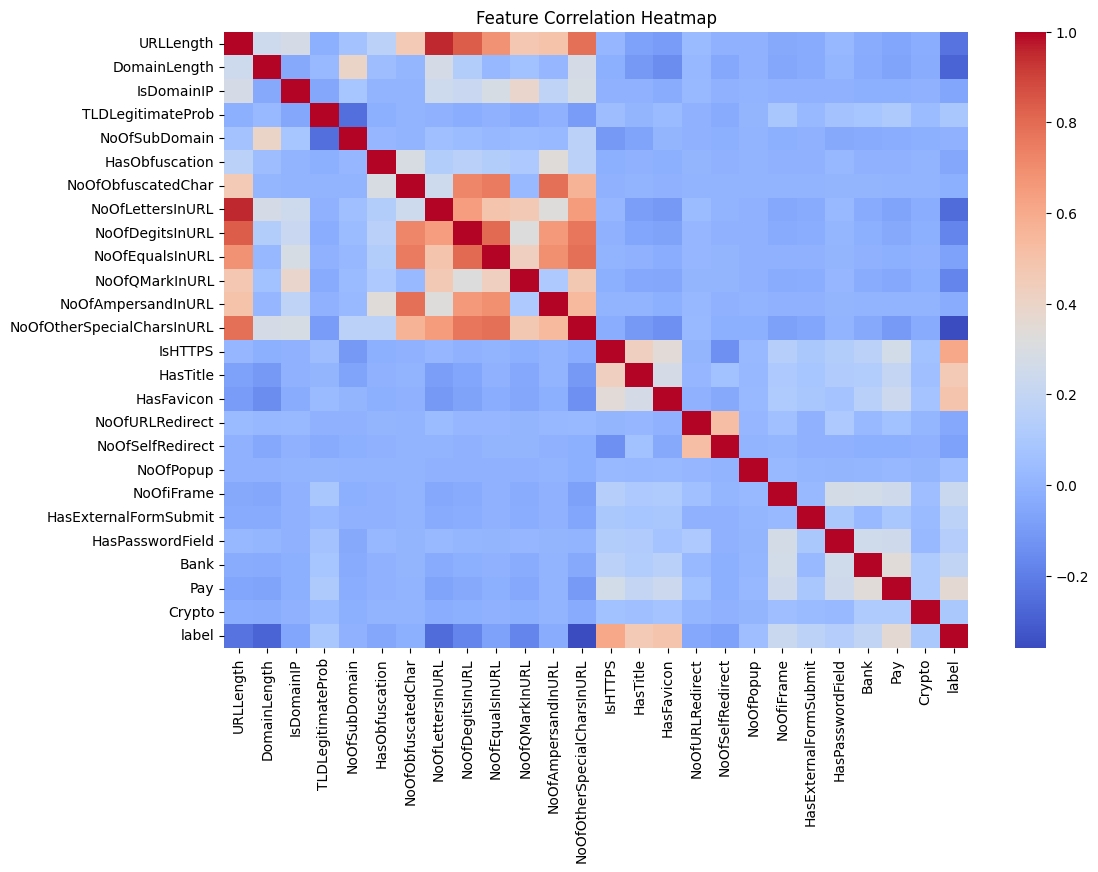

In [24]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
#  Reset index to ensure alignment
df = df.reset_index(drop=True)

#  Keep URLs separately for reporting
if 'URL' in df.columns:
    url_data = df['URL'].copy().reset_index(drop=True)
else:
    url_data = pd.Series(["N/A"] * len(df))

# Drop non-numeric columns
df = df.drop(columns=['URL'], errors='ignore')
df = df.drop(columns=drop_columns, errors='ignore')

df = df.reset_index(drop=True)
url_data = url_data.reindex(df.index)

# Split dataset (include url_data)
X = df.drop('label', axis=1)
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, urls_train, urls_test = train_test_split(
    X, y, url_data, test_size=0.2, random_state=42, stratify=y
)

#  Keep only numeric columns
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

print("\n Data ready for training. Numeric features only:", X_train.shape[1])
print(" URLs correctly aligned:", len(urls_test), "URLs in test set")


 Data ready for training. Numeric features only: 25
 URLs correctly aligned: 47159 URLs in test set


In [26]:
print(urls_test.head(5))


173310           https://www.lojewelers.com
62486            https://www.hengqin.gov.cn
14858             https://www.reedgroup.com
82943     https://www.indiaflowersgifts.com
72539              https://www.cozywozy.com
Name: URL, dtype: object


In [29]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    }

results = []

for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1, auc])
    print(f"{name} → Accuracy: {acc:.4f}, F1: {f1:.4f}")



 Training Random Forest...
Random Forest → Accuracy: 0.9981, F1: 0.9983

 Training AdaBoost...
AdaBoost → Accuracy: 0.9895, F1: 0.9908

 Training Gradient Boosting...
Gradient Boosting → Accuracy: 0.9954, F1: 0.9960

 Training XGBoost...
XGBoost → Accuracy: 0.9989, F1: 0.9990


In [30]:
results_df = pd.DataFrame(results, columns=['Model','Accuracy','Precision','Recall','F1','ROC-AUC'])
print(results_df.sort_values(by='Accuracy', ascending=False))


               Model  Accuracy  Precision    Recall        F1   ROC-AUC
3            XGBoost  0.998855   0.998297  0.999703  0.999000  0.998712
0      Random Forest  0.998092   0.997704  0.998962  0.998333  0.997945
2  Gradient Boosting  0.995420   0.994785  0.997219  0.996000  0.995118
1           AdaBoost  0.989482   0.986690  0.995032  0.990843  0.988550



 Best Model: XGBoost


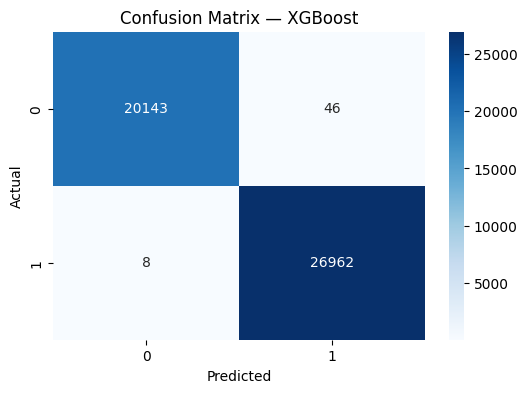


 Detailed Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


 Results saved to 'Phishing_Prediction_Results.csv'


In [31]:
# Identify Best Model & Evaluate


# Pick the best-performing model based on accuracy
best_model_name = results_df.sort_values(by='Accuracy', ascending=False).iloc[0, 0]
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name}")

# Predict using the best model
y_pred_best = best_model.predict(X_test)


# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classification Report

print(f"\n Detailed Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))

# (Optional) Save results with URLs if you have them
try:
    results_full = pd.DataFrame({
        'URL': urls_test.values,
        'Actual Label': y_test.values,
        'Predicted Label': y_pred_best
    })
    results_full.to_csv("Phishing_Prediction_Results.csv", index=False)
    print("\n Results saved to 'Phishing_Prediction_Results.csv'")
except Exception as e:
    print("\n Could not save URL results:", e)



In [32]:
pd.read_csv("/content/Phishing_Prediction_Results.csv")

,URL,Actual Label,Predicted Label
0,https://www.lojewelers.com,1,1
1,https://www.hengqin.gov.cn,1,1
2,https://www.reedgroup.com,1,1
3,https://www.indiaflowersgifts.com,1,1
4,https://www.cozywozy.com,1,1
...,...,...,...
47154,https://qcgnbk.webwave.dev/,0,0
47155,https://www.chbeck.de,1,1
47156,https://www.cosmofingerguard.com,1,1
47157,https://www.chameleonpower.com,1,1
